# CS 760 - Machine Learning - Homework 5

- Name: Manas Trivedi
- ID: 9085825512

## 1.2 Experiment

### K-Means Algorithm

In [309]:
import numpy as np
import matplotlib.pyplot as plt

In [310]:
def calculate_kmeans_accuracy(points, labels):
    num_labels = len(labels)
    labels_actual_zero = labels[:num_labels//3]
    labels_actual_one = labels[num_labels//3:(2*num_labels//3)]
    labels_actual_two = labels[(2*num_labels//3):]
    num_zeros = np.count_nonzero(labels_actual_zero == 0)
    num_ones = np.count_nonzero(labels_actual_one == 1)
    num_twos = np.count_nonzero(labels_actual_two == 2)
    return (num_zeros + num_ones + num_twos) / num_labels

In [311]:
def calculate_kmeans_objective(points, labels, distances_from_centroid_0, distances_from_centroid_1, distances_from_centroid_2):
    distances = np.choose(labels, [distances_from_centroid_0, distances_from_centroid_1, distances_from_centroid_2])
    return np.sum(distances**2)

In [312]:
def euclidean_distance(points, centroid):
    return np.linalg.norm(points - centroid, axis = 1)

In [313]:
def kmeans(points):
    centroid_0 = points[np.argmin(points[:, 0])]
    centroid_1 = points[np.argmax(points[:, 0])]
    centroid_2 = points[np.argmax(points[:, 1])]
    while True:
        distances_from_centroid_0 = euclidean_distance(points, centroid_0)
        distances_from_centroid_1 = euclidean_distance(points, centroid_1)
        distances_from_centroid_2 = euclidean_distance(points, centroid_2)
        labels = np.argmin(np.array([distances_from_centroid_0, distances_from_centroid_1, distances_from_centroid_2]), axis=0)
        new_centroid_0 = np.mean(points[labels == 0], axis=0)
        new_centroid_1 = np.mean(points[labels == 1], axis=0)
        new_centroid_2 = np.mean(points[labels == 2], axis=0)
        if np.array_equal(centroid_0, new_centroid_0) and np.array_equal(centroid_1, new_centroid_1) and np.array_equal(centroid_2, new_centroid_2):
            break
        else:
            centroid_0 = new_centroid_0
            centroid_1 = new_centroid_1
            centroid_2 = new_centroid_2
    accuracy = calculate_kmeans_accuracy(points, labels)
    objective = calculate_kmeans_objective(points, labels, distances_from_centroid_0, distances_from_centroid_1, distances_from_centroid_2)
    return objective, accuracy

Average objective value over sigma: 1378.9300575992497
Average accuracy over sigma: 0.6466666666666667


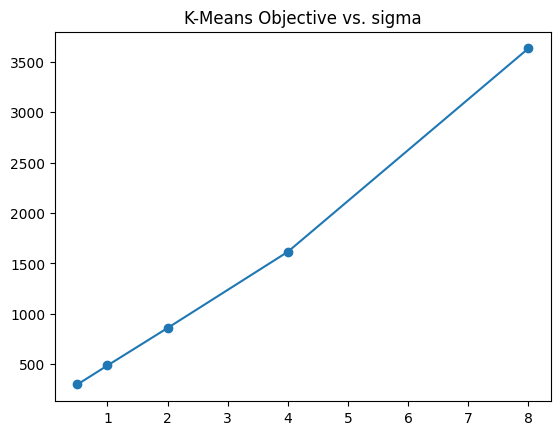

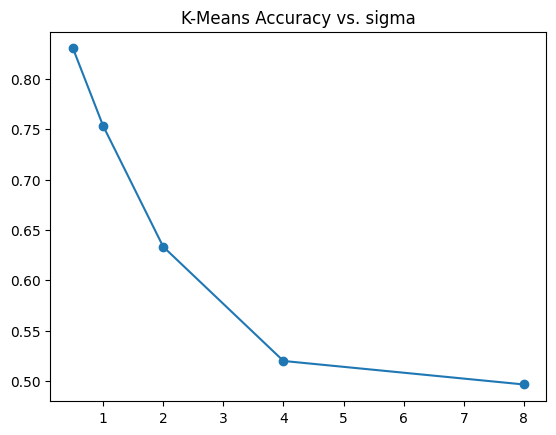

In [314]:
list_objective_kmeans = []
list_accuracy_kmeans = []

list_of_sigma = [0.5, 1, 2, 4, 8]

for sigma in list_of_sigma:

    cluster_a_points = np.random.multivariate_normal(np.array([-1, -1]), sigma * np.array([[2, 0.5], [0.5, 1]]), 100)
    cluster_b_points = np.random.multivariate_normal(np.array([1, -1]), sigma * np.array([[1, -0.5], [-0.5, 2]]), 100)
    cluster_c_points = np.random.multivariate_normal(np.array([0, 1]), sigma * np.array([[1, 0], [0, 2]]), 100)
    
    points = np.concatenate((cluster_a_points, cluster_b_points, cluster_c_points))
    
    objective_kmeans, accuracy_kmeans = kmeans(points)
    list_objective_kmeans.append(objective_kmeans)
    list_accuracy_kmeans.append(accuracy_kmeans)
print(f"Average objective value over sigma: {sum(list_objective_kmeans) / len(list_objective_kmeans)}")
print(f"Average accuracy over sigma: {sum(list_accuracy_kmeans) / len(list_accuracy_kmeans)}")
plt.plot(list_of_sigma, list_objective_kmeans)
plt.scatter(list_of_sigma, list_objective_kmeans)
plt.title('K-Means Objective vs. sigma')
plt.show()
plt.plot(list_of_sigma, list_accuracy_kmeans)
plt.scatter(list_of_sigma, list_accuracy_kmeans)
plt.title('K-Means Accuracy vs. sigma')
plt.show()

### Gaussian Mixture Model - EM Algorithm

In [301]:
from scipy.stats import multivariate_normal

In [359]:
def get_gmm_labels(points, mu_0, mu_1, mu_2, sigma_0, sigma_1, sigma_2, pi_0, pi_1, pi_2):

    labels = np.full(len(points), -1)
    
    for i in range(len(points)):

        mvn_0 = multivariate_normal(mean=mu_0, cov=sigma_0)
        mvn_1 = multivariate_normal(mean=mu_1, cov=sigma_1)
        mvn_2 = multivariate_normal(mean=mu_2, cov=sigma_2)
        
        prob_of_ith_point_under_dist_0 = pi_0 * mvn_0.pdf(points[i])
        prob_of_ith_point_under_dist_1 = pi_1 * mvn_1.pdf(points[i])
        prob_of_ith_point_under_dist_2 = pi_2 * mvn_2.pdf(points[i])
        
        if prob_of_ith_point_under_dist_0 < prob_of_ith_point_under_dist_1:
            if prob_of_ith_point_under_dist_1 < prob_of_ith_point_under_dist_2:
                labels[i] = 2
            else:
                labels[i] = 1
        else:
            if prob_of_ith_point_under_dist_0 < prob_of_ith_point_under_dist_2:
                labels[i] = 2
            else:
                labels[i] = 0
                
    return labels

In [353]:
def calculate_gmm_objective(points, labels, distances_from_mu_0, distances_from_mu_1, distances_from_mu_2):
    distances = np.choose(labels, [distances_from_mu_0, distances_from_mu_1, distances_from_mu_2])
    return np.sum(distances**2)

In [354]:
def calculate_gmm_accuracy(points, labels):
    num_labels = len(labels)
    labels_actual_zero = labels[:num_labels//3]
    labels_actual_one = labels[num_labels//3:(2*num_labels//3)]
    labels_actual_two = labels[(2*num_labels//3):]
    num_zeros = np.count_nonzero(labels_actual_zero == 0)
    num_ones = np.count_nonzero(labels_actual_one == 1)
    num_twos = np.count_nonzero(labels_actual_two == 2)
    return (num_zeros + num_ones + num_twos) / num_labels

In [365]:
# References:

# [1] A. Ihler, "Clustering (4): Gaussian Mixtures & EM", Machine Learning and Data Mining, https://youtu.be/qMTuMa86NzU?si=7Bd8wsHxgQ-lMv7A
# [2] T. Schlagenhauf, "Expectation Maximization and Gaussian Mixture Models (GMM)", Feb 2022, https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php

def gmm(points):

    cluster_ids = np.array([0, 1, 2])

    mu_0 = points[np.argmin(points[:, 0])]
    mu_1 = points[np.argmax(points[:, 0])]
    mu_2 = points[np.argmax(points[:, 1])]

    sigma_0 = np.array([[1, 0], [0, 2]])
    sigma_1 = np.array([[1, 0], [0, 2]])
    sigma_2 = np.array([[1, 0], [0, 2]])

    pi_0 = len(points) / 3
    pi_1 = len(points) / 3
    pi_2 = len(points) / 3

    alpha = 1e-6*np.identity(len(points[0]))

    # Cell [i, c] in responsibilities matrix will store 
    # the relative probability that the ith point belongs to cluster c

    count = 0

    while True:
        
        # E step
        responsibilities = np.full((len(points), len(cluster_ids)), fill_value = -1, dtype=np.float64)

        for i in range(len(points)):
            
            mvn_0 = multivariate_normal(mean=mu_0, cov=sigma_0)
            mvn_1 = multivariate_normal(mean=mu_1, cov=sigma_1)
            mvn_2 = multivariate_normal(mean=mu_2, cov=sigma_2)
            
            log_prob_of_ith_point_under_dist_0 = np.log(pi_0) + mvn_0.logpdf(points[i])
            log_prob_of_ith_point_under_dist_1 = np.log(pi_1) + mvn_1.logpdf(points[i])
            log_prob_of_ith_point_under_dist_2 = np.log(pi_2) + mvn_2.logpdf(points[i])
            log_total_prob_of_ith_point_under_all_dist = np.log(np.exp(log_prob_of_ith_point_under_dist_0) + np.exp(log_prob_of_ith_point_under_dist_1) + np.exp(log_prob_of_ith_point_under_dist_2))
            responsibilities[i][0] = np.exp(log_prob_of_ith_point_under_dist_0 - log_total_prob_of_ith_point_under_all_dist)
            responsibilities[i][1] = np.exp(log_prob_of_ith_point_under_dist_1 - log_total_prob_of_ith_point_under_all_dist)
            responsibilities[i][2] = np.exp(log_prob_of_ith_point_under_dist_2 - log_total_prob_of_ith_point_under_all_dist)
        
        # M step
        total_responsibility_to_cluster_0 = np.sum(responsibilities[:, 0])
        total_responsibility_to_cluster_1 = np.sum(responsibilities[:, 1])
        total_responsibility_to_cluster_2 = np.sum(responsibilities[:, 2])
        
        pi_0 = total_responsibility_to_cluster_0 / len(points)
        pi_1 = total_responsibility_to_cluster_1 / len(points)
        pi_2 = total_responsibility_to_cluster_2 / len(points)

        responsibilities_0 = responsibilities[:, 0]
        responsibilities_1 = responsibilities[:, 1]
        responsibilities_2 = responsibilities[:, 2]
        
        mu_0 = (np.sum(responsibilities_0[:, np.newaxis] * points, axis = 0)) / total_responsibility_to_cluster_0
        mu_1 = (np.sum(responsibilities_1[:, np.newaxis] * points, axis = 0)) / total_responsibility_to_cluster_1
        mu_2 = (np.sum(responsibilities_2[:, np.newaxis] * points, axis = 0)) / total_responsibility_to_cluster_2

        sigma_0 = ((1/total_responsibility_to_cluster_0)*np.dot((np.array(responsibilities_0[:, np.newaxis]).reshape(len(points),1)*(points-mu_0)).T,(points - mu_0))) + alpha
        sigma_1 = ((1/total_responsibility_to_cluster_1)*np.dot((np.array(responsibilities_1[:, np.newaxis]).reshape(len(points),1)*(points-mu_1)).T,(points - mu_1))) + alpha
        sigma_2 = ((1/total_responsibility_to_cluster_2)*np.dot((np.array(responsibilities_2[:, np.newaxis]).reshape(len(points),1)*(points-mu_2)).T,(points - mu_2))) + alpha

        count += 1
        if count == 100:
            break

    labels = get_gmm_labels(points, mu_0, mu_1, mu_2, sigma_0, sigma_1, sigma_2, pi_0, pi_1, pi_2)

    distances_from_mu_0 = euclidean_distance(points, mu_0)
    distances_from_mu_1 = euclidean_distance(points, mu_1)
    distances_from_mu_2 = euclidean_distance(points, mu_2)
    
    objective = calculate_gmm_objective(points, labels, distances_from_mu_0, distances_from_mu_1, distances_from_mu_2)
    accuracy = calculate_gmm_accuracy(points, labels)
    
    return objective, accuracy

Average objective value over sigma: 2123.3280406004433
Average accuracy over sigma: 0.5306666666666667


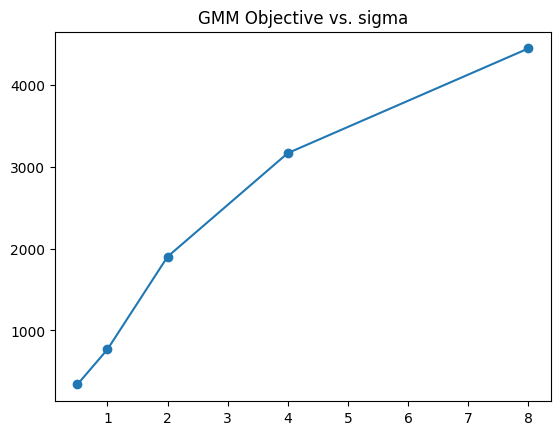

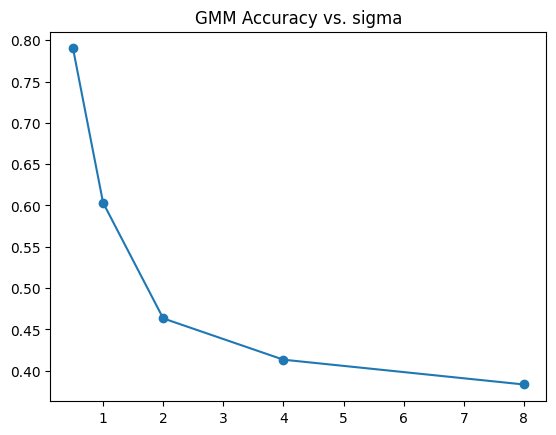

In [367]:
list_objective_gmm = []
list_accuracy_gmm = []

list_of_sigma = [0.5, 1, 2, 4, 8]

for sigma in list_of_sigma:

    cluster_a_points = np.random.multivariate_normal(np.array([-1, -1]), sigma * np.array([[2, 0.5], [0.5, 1]]), 100)
    cluster_b_points = np.random.multivariate_normal(np.array([1, -1]), sigma * np.array([[1, -0.5], [-0.5, 2]]), 100)
    cluster_c_points = np.random.multivariate_normal(np.array([0, 1]), sigma * np.array([[1, 0], [0, 2]]), 100)
    
    points = np.concatenate((cluster_a_points, cluster_b_points, cluster_c_points))
    
    objective_gmm, accuracy_gmm = gmm(points)
    list_objective_gmm.append(objective_gmm)
    list_accuracy_gmm.append(accuracy_gmm)

print(f"Average objective value over sigma: {sum(list_objective_gmm) / len(list_objective_gmm)}")
print(f"Average accuracy over sigma: {sum(list_accuracy_gmm) / len(list_accuracy_gmm)}")
plt.plot(list_of_sigma, list_objective_gmm)
plt.scatter(list_of_sigma, list_objective_gmm)
plt.title('GMM Objective vs. sigma')
plt.show()
plt.plot(list_of_sigma, list_accuracy_gmm)
plt.scatter(list_of_sigma, list_accuracy_gmm)
plt.title('GMM Accuracy vs. sigma')
plt.show()

# 2.3 Experiment

### Buggy PCA

In [248]:
# References:
# 1. A. Dutt, "Step-by-step Principal Component Analysis", Towards Data Science, Oct 2021, https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598

def buggy_pca(data, d):
    parameters = []
    sample_covariance_matrix = np.cov(data, rowvar = False)
    eigenvalues, eigenvectors = np.linalg.eigh(sample_covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_d_eigenvectors = eigenvectors[:,:d]
    projected_data = np.dot(data, top_d_eigenvectors)
    reconstructed_data = np.dot(projected_data, top_d_eigenvectors.T)
    return projected_data, parameters, reconstructed_data

### Demeaned PCA

In [184]:
def demeaned_pca(data, d):
    demeaned_data = data - np.mean(data, axis = 0)
    projected_data, parameters, reconstructed_data =  buggy_pca(demeaned_data, d)
    reconstructed_data = reconstructed_data + np.mean(data, axis = 0)
    return projected_data, parameters, reconstructed_data

### Normalized PCA

In [185]:
def normalized_pca(data, d):
    demeaned_data = data - np.mean(data, axis = 0)
    normalized_data = demeaned_data / np.std(demeaned_data, axis = 0)
    projected_data, parameters, reconstructed_data =  buggy_pca(normalized_data, d)
    reconstructed_data = reconstructed_data * np.std(demeaned_data, axis = 0)
    reconstructed_data = reconstructed_data + np.mean(data, axis = 0)
    return projected_data, parameters, reconstructed_data

### DRO

In [242]:
# Reference:
# [1] V. Guruswami, "Computer Science Theory for the Information Age", Chapter 4, Feb 2012, https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf
# [2] P. Caceres, "Best rank-k approximation with SVD", https://pabloinsente.github.io/intro-linear-algebra\#best-rank-k-approximation-with-svd

def dro(data, d):
    parameters = []
    demeaned_data = data - np.mean(data, axis = 0)
    U, Sigma, V_transpose = np.linalg.svd(demeaned_data, full_matrices = False)
    if d > 1:
        plt.plot(Sigma)
        plt.grid()
        plt.title('Singular values')
        plt.show()
        plt.plot(Sigma[:50])
        plt.grid()
        plt.title('Singular values for d <= 50')
        plt.show()
    U_d = U[:, :d]
    Sigma_d = np.diag(Sigma[:d])
    V_d = V_transpose[:d, :].T
    A = (np.dot(Sigma_d, V_d.T)).T
    projected_data = U_d
    reconstructed_data = np.dot(projected_data, A.T) + np.mean(data, axis = 0)
    return projected_data, parameters, reconstructed_data

### For 2D Dataset

2D Reconstruction error for Buggy PCA: 22.68257835609427
2D Reconstruction error for Demeaned PCA: 0.005003042814256452
2D Reconstruction error for Normalized PCA: 0.024736041727385333
2D Reconstruction error for DRO: 0.005003042814256462


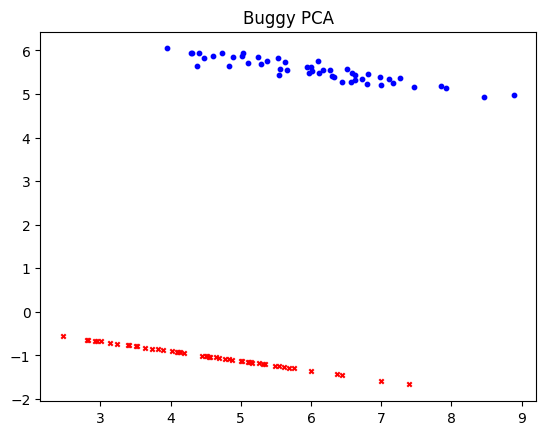

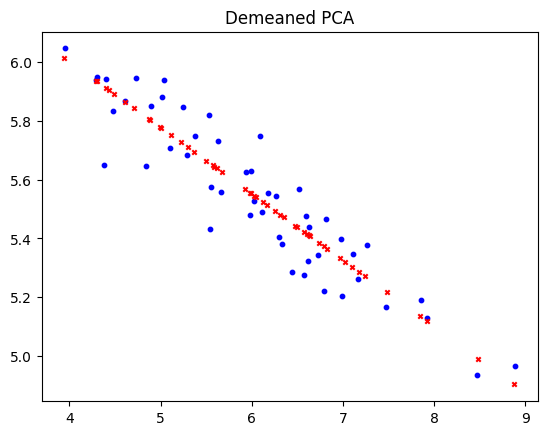

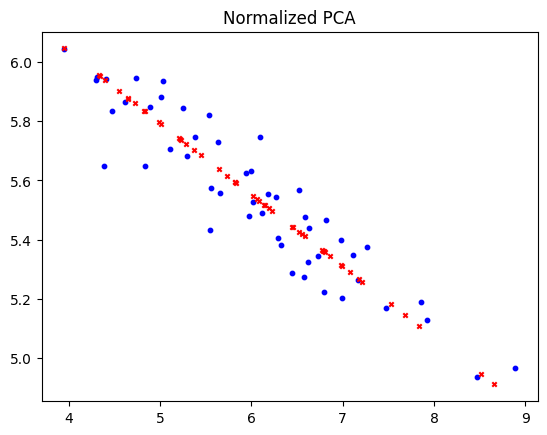

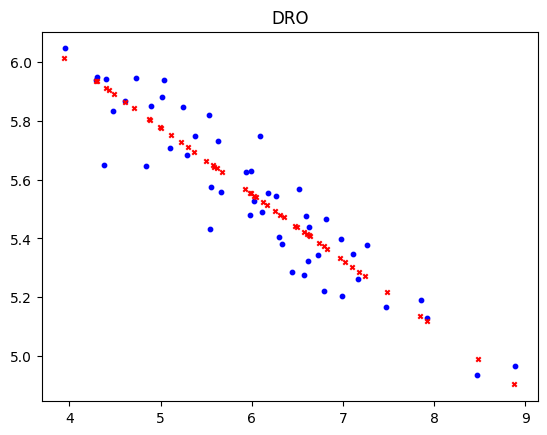

In [246]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/Data2D.csv', header = None)
data = data.to_numpy()

projected_data_buggy, parameters_buggy, reconstructed_data_buggy = buggy_pca(data, d = 1)
projected_data_demeaned, parameters_demeaned, reconstructed_data_demeaned = demeaned_pca(data, d = 1)
projected_data_normalized, parameters_normalized, reconstructed_data_normalized = normalized_pca(data, d = 1)
projected_data_dro, parameters_dro, reconstructed_data_dro = dro(data, d = 1)

reconstruction_error_buggy = np.mean(np.square(data - reconstructed_data_buggy))
reconstruction_error_demeaned = np.mean(np.square(data - reconstructed_data_demeaned))
reconstruction_error_normalized = np.mean(np.square(data - reconstructed_data_normalized))
reconstruction_error_dro = np.mean(np.square(data - reconstructed_data_dro))

print(f"2D Reconstruction error for Buggy PCA: {reconstruction_error_buggy}")
print(f"2D Reconstruction error for Demeaned PCA: {reconstruction_error_demeaned}")
print(f"2D Reconstruction error for Normalized PCA: {reconstruction_error_normalized}")
print(f"2D Reconstruction error for DRO: {reconstruction_error_dro}")

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = 'b', s = 10)
plt.scatter(reconstructed_data_buggy[:, 0], reconstructed_data_buggy[:, 1], marker = 'x', c = 'r', s = 10)
plt.title('Buggy PCA')
plt.show()

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = 'b', s = 10)
plt.scatter(reconstructed_data_demeaned[:, 0], reconstructed_data_demeaned[:, 1], marker = 'x', c = 'r', s = 10)
plt.title('Demeaned PCA')
plt.show()

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = 'b', s = 10)
plt.scatter(reconstructed_data_normalized[:, 0], reconstructed_data_normalized[:, 1], marker = 'x', c = 'r', s = 10)
plt.title('Normalized PCA')
plt.show()

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = 'b', s = 10)
plt.scatter(reconstructed_data_dro[:, 0], reconstructed_data_dro[:, 1], marker = 'x', c = 'r', s = 10)
plt.title('DRO')
plt.show()

### For 1000D Dataset

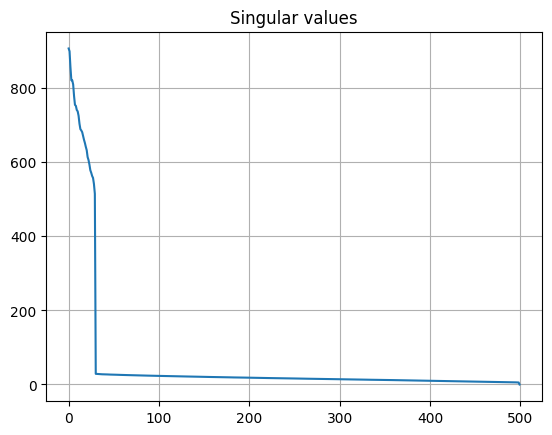

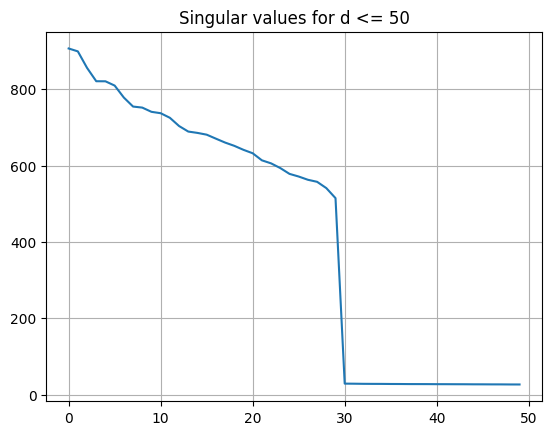

1000D Reconstruction error for Buggy PCA: 499.7487781032509
1000D Reconstruction error for Demeaned PCA: 0.27304595897860284
1000D Reconstruction error for Normalized PCA: 0.27362858099762327
1000D Reconstruction error for DRO: 0.27304595897860284


In [247]:
import numpy as np
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv('data/Data1000D.csv', header=None)
data = data.to_numpy()

projected_data_buggy, parameters_buggy, reconstructed_data_buggy = buggy_pca(data, d = 30)
projected_data_demeaned, parameters_demeaned, reconstructed_data_demeaned = demeaned_pca(data, d = 30)
projected_data_normalized, parameters_normalized, reconstructed_data_normalized = normalized_pca(data, d = 30)
projected_data_dro, parameters_dro, reconstructed_data_dro = dro(data, d = 30)

reconstruction_error_buggy = np.mean(np.square(data - reconstructed_data_buggy))
reconstruction_error_demeaned = np.mean(np.square(data - reconstructed_data_demeaned))
reconstruction_error_normalized = np.mean(np.square(data - reconstructed_data_normalized))
reconstruction_error_dro = np.mean(np.square(data - reconstructed_data_dro))

print(f"1000D Reconstruction error for Buggy PCA: {reconstruction_error_buggy}")
print(f"1000D Reconstruction error for Demeaned PCA: {reconstruction_error_demeaned}")
print(f"1000D Reconstruction error for Normalized PCA: {reconstruction_error_normalized}")
print(f"1000D Reconstruction error for DRO: {reconstruction_error_dro}")